In [63]:
pip install world_bank_data --upgrade

Requirement already up-to-date: world_bank_data in c:\users\broth\anaconda3\envs\kittycat\lib\site-packages (0.1.3)
Note: you may need to restart the kernel to use updated packages.


In [64]:
import pandas as pd
import world_bank_data as wb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [65]:
indicators = ["SP.POP.TOTL","NY.GDP.MKTP.CD","NY.GDP.PCAP.CD",'SP.DYN.LE00.IN','SH.STA.DIAB.ZS','EN.ATM.CO2E.PC','SE.PRM.ENRL.TC.ZS','SL.UEM.TOTL.ZS','SE.XPD.TOTL.GD.ZS','SP.RUR.TOTL.ZS','EG.FEC.RNEW.ZS','EN.ATM.PM25.MC.ZS']
from functools import reduce
data_all = []
for i in range(0, (len(indicators))):
    data = pd.DataFrame(wb.get_series(indicators[i],mrv=1)).reset_index()
    data = data.drop(labels=['Series','Year'],axis='columns')
    data_all.append(data)
    
data_all
df = reduce(lambda df1,df2: pd.merge(df1,df2,on='Country'), data_all).rename(columns={"SP.POP.TOTL":'population',"NY.GDP.MKTP.CD":'GDP_in_Dollar','NY.GDP.PCAP.CD':'gdp_per_cap','SP.DYN.LE00.IN':'life_exp','SH.STA.DIAB.ZS':'diabetes_percent','EN.ATM.CO2E.PC':'co2_per_cap','SL.UEM.TOTL.ZS':'unemp','SE.PRM.ENRL.TC.ZS':'teacher','SP.RUR.TOTL.ZS':'rural_pop','EG.FEC.RNEW.ZS':'renewable_percent','SE.XPD.TOTL.GD.ZS':'educat_expen','EN.ATM.PM25.MC.ZS':'airplution'})
df

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,teacher,unemp,educat_expen,rural_pop,renewable_percent,airplution
0,Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,NaN,10.191472,NaN,40.798353,4.094037,100.000000
1,Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,NaN,8.092527,5.16919,48.630009,8.825977,99.998738
2,Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,NaN,3.641848,NaN,37.561644,17.121893,97.949799
3,Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,NaN,5.844164,NaN,54.459204,25.554845,99.353070
4,East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,NaN,3.897888,NaN,40.113467,13.857603,96.877523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Virgin Islands (U.S.),1.066310e+05,NaN,NaN,79.568293,12.300000,NaN,NaN,8.759000,NaN,4.168000,3.877525,40.000000
260,West Bank and Gaza,4.685306e+06,NaN,NaN,73.895000,9.500000,0.740607,NaN,26.098000,NaN,23.560000,10.472715,100.000000
261,"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,NaN,12.830000,NaN,62.727000,2.276417,100.000000
262,Zambia,1.786103e+07,2.330977e+10,1305.063254,63.510000,4.500000,0.314183,NaN,11.412000,NaN,55.928000,87.985452,100.000000


In [66]:
df.isna().sum()

Country                0
population             2
GDP_in_Dollar         34
gdp_per_cap           34
life_exp              20
diabetes_percent       8
co2_per_cap           16
teacher              260
unemp                 31
educat_expen         247
rural_pop              4
renewable_percent      5
airplution            24
dtype: int64

In [67]:
# Dropping teacher & educat_expen

In [68]:
df.set_index('Country')

,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,teacher,unemp,educat_expen,rural_pop,renewable_percent,airplution
Country,,,,,,,,,,,,
Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,NaN,10.191472,NaN,40.798353,4.094037,100.000000
Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,NaN,8.092527,5.16919,48.630009,8.825977,99.998738
Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,NaN,3.641848,NaN,37.561644,17.121893,97.949799
Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,NaN,5.844164,NaN,54.459204,25.554845,99.353070
East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,NaN,3.897888,NaN,40.113467,13.857603,96.877523
...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),1.066310e+05,NaN,NaN,79.568293,12.300000,NaN,NaN,8.759000,NaN,4.168000,3.877525,40.000000
West Bank and Gaza,4.685306e+06,NaN,NaN,73.895000,9.500000,0.740607,NaN,26.098000,NaN,23.560000,10.472715,100.000000
"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,NaN,12.830000,NaN,62.727000,2.276417,100.000000


In [69]:
df.drop(["teacher","educat_expen"], axis=1, inplace=True)


In [70]:
df.set_index('Country')

,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
Country,,,,,,,,,,
Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000
Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738
Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799
Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070
East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523
...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),1.066310e+05,NaN,NaN,79.568293,12.300000,NaN,8.759000,4.168000,3.877525,40.000000
West Bank and Gaza,4.685306e+06,NaN,NaN,73.895000,9.500000,0.740607,26.098000,23.560000,10.472715,100.000000
"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,12.830000,62.727000,2.276417,100.000000


In [71]:
df.dropna(axis=0, how='any',inplace=True)
df

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
0,Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000
1,Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738
2,Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799
3,Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070
4,East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523
...,...,...,...,...,...,...,...,...,...,...,...
256,Vanuatu,2.998820e+05,9.342400e+08,3115.358620,70.323000,11.900000,0.527000,4.408000,74.606000,36.111065,100.000000
258,Vietnam,9.646211e+07,2.619212e+11,2715.276036,75.317000,6.000000,2.057566,2.022000,63.372000,34.998570,100.000000
261,"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,12.830000,62.727000,2.276417,100.000000
262,Zambia,1.786103e+07,2.330977e+10,1305.063254,63.510000,4.500000,0.314183,11.412000,55.928000,87.985452,100.000000


In [72]:
df.set_index('Country')

,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
Country,,,,,,,,,,
Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000
Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738
Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799
Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070
East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2.998820e+05,9.342400e+08,3115.358620,70.323000,11.900000,0.527000,4.408000,74.606000,36.111065,100.000000
Vietnam,9.646211e+07,2.619212e+11,2715.276036,75.317000,6.000000,2.057566,2.022000,63.372000,34.998570,100.000000
"Yemen, Rep.",2.916192e+07,2.258108e+10,774.334490,66.096000,5.400000,0.390480,12.830000,62.727000,2.276417,100.000000


In [73]:
df.head(50)

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
0,Arab World,4.278703e+08,2.817415e+12,6584.740241,71.806825,12.536001,4.712845,10.191472,40.798353,4.094037,100.000000
1,Caribbean small states,7.401383e+06,7.772171e+10,10500.971902,73.637109,11.629346,8.490807,8.092527,48.630009,8.825977,99.998738
2,Central Europe and the Baltics,1.023786e+08,1.668852e+12,16300.792072,76.976845,6.296002,6.377623,3.641848,37.561644,17.121893,97.949799
3,Early-demographic dividend,3.290291e+09,1.198987e+13,3644.014598,70.483191,10.090910,2.345693,5.844164,54.459204,25.554845,99.353070
4,East Asia & Pacific,2.340628e+09,2.698777e+13,11530.138135,76.068336,8.202608,6.071789,3.897888,40.113467,13.857603,96.877523
5,East Asia & Pacific (excluding high income),2.093675e+09,1.721478e+13,8222.276873,75.210512,8.488062,5.562986,3.951413,43.429996,15.861236,99.092879
6,East Asia & Pacific (IDA & IBRD countries),2.067984e+09,1.718189e+13,8308.522906,75.249229,8.514102,5.618534,3.969032,43.499398,15.838521,99.081561
7,Euro area,3.425977e+08,1.335606e+13,38984.685990,82.059617,6.760327,6.545140,7.254748,22.782314,16.083262,77.369321
8,Europe & Central Asia,9.211401e+08,2.279282e+13,24744.140288,77.908607,6.686969,6.882182,6.631572,27.590851,13.073085,85.056012
9,Europe & Central Asia (excluding high income),3.994046e+08,3.248462e+12,8133.260847,73.590782,7.231416,7.583597,7.376411,32.181242,5.922013,96.297561


In [74]:
df_cleaned = df.iloc[44:]
df_cleaned

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
47,Afghanistan,38041754.0,1.929110e+10,507.103432,64.486,9.2,0.245101,11.164,74.246,18.423477,100.000000
48,Albania,2854191.0,1.527918e+10,5353.244856,78.458,9.0,1.577163,12.813,38.771,38.615210,100.000000
49,Algeria,43053054.0,1.710913e+11,3973.964072,76.693,6.7,3.699156,11.525,26.811,0.058959,100.000000
52,Angola,31825295.0,8.881570e+10,2790.726615,60.782,4.5,1.202861,6.774,33.823,49.568210,100.000000
54,Argentina,44938712.0,4.454452e+11,9912.281809,76.520,5.9,4.619085,10.436,8.009,10.040078,93.852825
...,...,...,...,...,...,...,...,...,...,...,...
256,Vanuatu,299882.0,9.342400e+08,3115.358620,70.323,11.9,0.527000,4.408,74.606,36.111065,100.000000
258,Vietnam,96462106.0,2.619212e+11,2715.276036,75.317,6.0,2.057566,2.022,63.372,34.998570,100.000000
261,"Yemen, Rep.",29161922.0,2.258108e+10,774.334490,66.096,5.4,0.390480,12.830,62.727,2.276417,100.000000
262,Zambia,17861030.0,2.330977e+10,1305.063254,63.510,4.5,0.314183,11.412,55.928,87.985452,100.000000


In [75]:
df_corr = pd.DataFrame(df_cleaned,columns=['population','GDP_in_Dollar',"gdp_per_cap","life_exp","diabetes_percent","co2_per_cap","unemp","rural_pop","renewable_percent","airplution"]).corr()
df_corr

,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
population,1.000000,0.574248,-0.043606,0.003481,0.078807,0.002503,-0.075626,0.046799,-0.030021,0.021502
GDP_in_Dollar,0.574248,1.000000,0.250437,0.177344,0.072423,0.204171,-0.092654,-0.158726,-0.155241,-0.234851
gdp_per_cap,-0.043606,0.250437,1.000000,0.647253,0.021952,0.577015,-0.165030,-0.583157,-0.339733,-0.590240
life_exp,0.003481,0.177344,0.647253,1.000000,0.276249,0.468163,-0.053378,-0.603431,-0.624216,-0.427901
diabetes_percent,0.078807,0.072423,0.021952,0.276249,1.000000,0.293922,0.029620,-0.044166,-0.379581,0.046327
co2_per_cap,0.002503,0.204171,0.577015,0.468163,0.293922,1.000000,-0.141753,-0.528946,-0.523192,-0.264972
unemp,-0.075626,-0.092654,-0.165030,-0.053378,0.029620,-0.141753,1.000000,-0.086823,-0.173036,0.085875
rural_pop,0.046799,-0.158726,-0.583157,-0.603431,-0.044166,-0.528946,-0.086823,1.000000,0.529315,0.308287
renewable_percent,-0.030021,-0.155241,-0.339733,-0.624216,-0.379581,-0.523192,-0.173036,0.529315,1.000000,0.076157
airplution,0.021502,-0.234851,-0.590240,-0.427901,0.046327,-0.264972,0.085875,0.308287,0.076157,1.000000


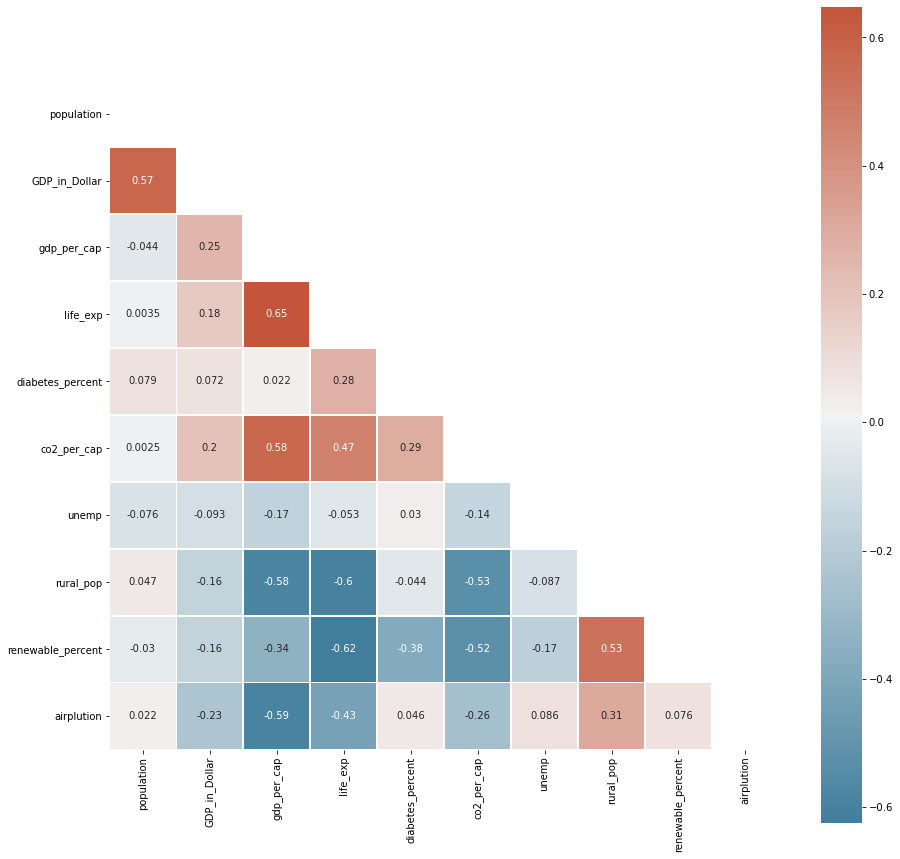

In [76]:
#corr = df.drop(['GDP','Population_in_mil'],axis=1).corr() #correlation matix ohne gsd und ohne population
f, ax = plt.subplots(figsize=(15, 15)) 
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # removing the other side of the heatmap 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
#preparing cmap 
sns.heatmap(df_corr,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True) 
plt.show()

In [84]:
df_final = df_cleaned.set_index('Country')
df_final

,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
Country,,,,,,,,,,
Afghanistan,38041754.0,1.929110e+10,507.103432,64.486,9.2,0.245101,11.164,74.246,18.423477,100.000000
Albania,2854191.0,1.527918e+10,5353.244856,78.458,9.0,1.577163,12.813,38.771,38.615210,100.000000
Algeria,43053054.0,1.710913e+11,3973.964072,76.693,6.7,3.699156,11.525,26.811,0.058959,100.000000
Angola,31825295.0,8.881570e+10,2790.726615,60.782,4.5,1.202861,6.774,33.823,49.568210,100.000000
Argentina,44938712.0,4.454452e+11,9912.281809,76.520,5.9,4.619085,10.436,8.009,10.040078,93.852825
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,299882.0,9.342400e+08,3115.358620,70.323,11.9,0.527000,4.408,74.606,36.111065,100.000000
Vietnam,96462106.0,2.619212e+11,2715.276036,75.317,6.0,2.057566,2.022,63.372,34.998570,100.000000
"Yemen, Rep.",29161922.0,2.258108e+10,774.334490,66.096,5.4,0.390480,12.830,62.727,2.276417,100.000000


In [85]:
X = df_final

### Standardizing numeric features

In [86]:
from sklearn.preprocessing import StandardScaler # makes mean ~ 0 and Std ~ 1 (but does not necessarily create normal distribution!!)
X_prep = StandardScaler().fit_transform(X)

# Now, all features will have the same weight.
pd.DataFrame(X_prep, columns = X.columns).head()
pd.DataFrame(X_prep).describe()
#looking good

,0,1,2,3,4,5,6,7,8,9
count,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,166.000000,1.660000e+02
mean,2.574915e-17,-3.344045e-18,4.949187e-17,-4.012854e-17,3.183531e-16,5.016068e-17,6.119603e-17,8.828279e-17,0.000000,-7.356900e-18
std,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026,1.003026e+00
min,-2.800738e-01,-2.345672e-01,-7.030135e-01,-2.587455e+00,-1.685852e+00,-7.580923e-01,-1.303270e+00,-1.815584e+00,-1.197510,-3.288459e+00
25%,-2.627770e-01,-2.284534e-01,-6.190787e-01,-7.352642e-01,-6.340646e-01,-6.485794e-01,-6.691044e-01,-8.435532e-01,-0.871356,3.707764e-01
50%,-2.190587e-01,-2.123740e-01,-4.245554e-01,2.085579e-01,-2.665728e-01,-3.211575e-01,-3.231393e-01,-4.960802e-03,-0.276767,4.015330e-01
75%,-8.550588e-02,-1.135212e-01,1.228976e-01,7.059892e-01,4.747469e-01,2.355270e-01,4.242546e-01,7.548749e-01,0.672649,4.015330e-01
max,8.694397e+00,1.013824e+01,5.083283e+00,1.590663e+00,3.636444e+00,5.943533e+00,4.141473e+00,2.006062e+00,2.197507,4.015330e-01


In [89]:
df_standardized = pd.DataFrame(X_prep)
df_standardized

,0,1,2,3,4,5,6,7,8,9
0,-0.036467,-0.225433,-0.690583,-1.033464,0.392378,-0.720261,0.821704,1.455216,-0.544728,0.401533
1,-0.262417,-0.227375,-0.445560,0.825312,0.341690,-0.490633,1.137900,-0.107584,0.170706,0.401533
2,-0.004288,-0.151967,-0.515297,0.590504,-0.241229,-0.124832,0.890926,-0.634464,-1.195421,0.401533
3,-0.076385,-0.191786,-0.575122,-1.526228,-0.798802,-0.555157,-0.020078,-0.325561,0.558793,0.401533
4,0.007820,-0.019188,-0.215054,0.567488,-0.443983,0.033750,0.682110,-1.462759,-0.841769,0.174703
...,...,...,...,...,...,...,...,...,...,...
161,-0.278819,-0.234318,-0.558709,-0.256934,1.076673,-0.671666,-0.473759,1.471076,0.081979,0.401533
162,0.338667,-0.108008,-0.578937,0.407446,-0.418638,-0.407819,-0.931275,0.976178,0.042561,0.401533
163,-0.093487,-0.223841,-0.677072,-0.819276,-0.570704,-0.695200,1.141160,0.947763,-1.116851,0.401533
164,-0.166054,-0.223489,-0.650238,-1.163307,-0.798802,-0.708353,0.869258,0.648243,1.919994,0.401533


In [98]:
X_prep = df_standardized

### K-means

In [99]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state = 1234)
model.fit_predict(df_standardized)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state = 1234)
kmeans.fit(X_prep)

KMeans(random_state=1234)

In [101]:
clusters = kmeans.predict(X_prep)
clusters

array([6, 5, 5, 1, 0, 5, 4, 0, 0, 0, 2, 6, 6, 0, 0, 6, 1, 6, 0, 5, 5, 5,
       4, 0, 1, 1, 5, 1, 1, 4, 1, 1, 0, 3, 5, 6, 1, 1, 5, 1, 0, 0, 0, 4,
       5, 0, 0, 6, 0, 5, 4, 1, 1, 6, 4, 5, 1, 5, 0, 1, 5, 6, 1, 1, 6, 1,
       6, 0, 4, 3, 6, 5, 4, 0, 6, 0, 5, 0, 1, 0, 2, 6, 1, 0, 0, 1, 1, 5,
       0, 4, 1, 1, 0, 4, 1, 0, 5, 6, 0, 6, 0, 5, 5, 1, 1, 5, 1, 0, 4, 6,
       1, 1, 5, 4, 0, 6, 0, 6, 6, 0, 6, 0, 4, 2, 0, 0, 1, 6, 5, 2, 1, 5,
       1, 0, 0, 0, 6, 5, 4, 6, 5, 5, 6, 4, 4, 6, 1, 0, 6, 1, 6, 2, 5, 5,
       1, 5, 2, 0, 7, 4, 6, 6, 6, 5, 1, 1])

[2, 3, 4, 5, 6, 7, 8]
[0.28630094732418787, 0.2527833005265907, 0.2718699520289029, 0.27778968730163306, 0.2503667702425797, 0.27578787980971003, 0.2738530515880047]


Text(0.5, 1.0, 'Silhouette Score showing the optimal k')

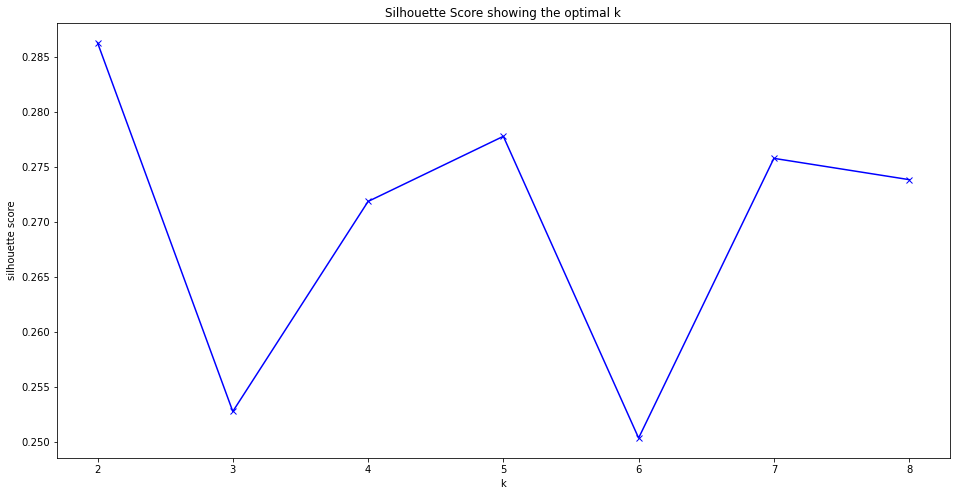

In [102]:
from sklearn.metrics import silhouette_score

K = range(2, 9)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))

print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score showing the optimal k')

In [103]:
kmeans.inertia_

494.6662625749676

[1, 2, 3, 4, 5, 6, 7, 8]
[1659.9999999999998, 1262.9979770840757, 1038.3653276910084, 825.3445187295221, 724.0360389250125, 647.6316803232176, 569.3949556618732, 494.6662625749676]


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

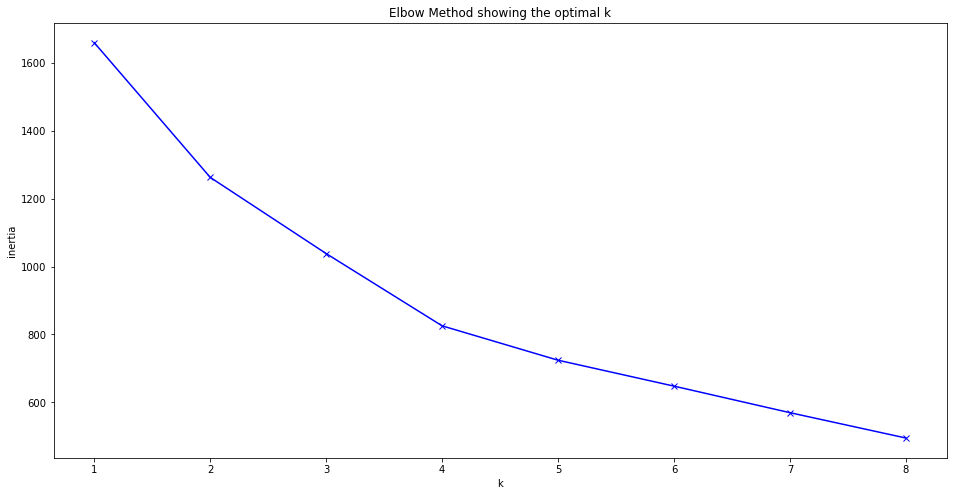

In [104]:
K = range(1, 9)
print(list(K))
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

print(inertia)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Kmeans with 5 clusters

In [108]:
model = KMeans(n_clusters=5)
clusters = model.fit_predict(X_prep)
print(silhouette_score(X_prep, clusters))

0.2564031164884977


In [109]:
print(pd.Series(clusters).value_counts().sort_index())

0    68
1    33
2    22
3    40
4     3
dtype: int64


### Kmeans with 7 clusters

In [110]:
model = KMeans(n_clusters=7)
clusters = model.fit_predict(X_prep)
print(silhouette_score(X_prep, clusters))

0.280826408931768


In [111]:
print(pd.Series(clusters).value_counts().sort_index())

0    29
1    46
2     3
3    17
4     6
5    36
6    29
dtype: int64


### Kmeans without GDP & Population

In [116]:
df_cleaned

,Country,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
47,Afghanistan,507.103432,64.486,9.2,0.245101,11.164,74.246,18.423477,100.000000
48,Albania,5353.244856,78.458,9.0,1.577163,12.813,38.771,38.615210,100.000000
49,Algeria,3973.964072,76.693,6.7,3.699156,11.525,26.811,0.058959,100.000000
52,Angola,2790.726615,60.782,4.5,1.202861,6.774,33.823,49.568210,100.000000
54,Argentina,9912.281809,76.520,5.9,4.619085,10.436,8.009,10.040078,93.852825
...,...,...,...,...,...,...,...,...,...
256,Vanuatu,3115.358620,70.323,11.9,0.527000,4.408,74.606,36.111065,100.000000
258,Vietnam,2715.276036,75.317,6.0,2.057566,2.022,63.372,34.998570,100.000000
261,"Yemen, Rep.",774.334490,66.096,5.4,0.390480,12.830,62.727,2.276417,100.000000
262,Zambia,1305.063254,63.510,4.5,0.314183,11.412,55.928,87.985452,100.000000


In [117]:
df_corr = pd.DataFrame(df_cleaned,columns=["gdp_per_cap","life_exp","diabetes_percent","co2_per_cap","unemp","rural_pop","renewable_percent","airplution"]).corr()
df_corr

,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
gdp_per_cap,1.000000,0.647253,0.021952,0.577015,-0.165030,-0.583157,-0.339733,-0.590240
life_exp,0.647253,1.000000,0.276249,0.468163,-0.053378,-0.603431,-0.624216,-0.427901
diabetes_percent,0.021952,0.276249,1.000000,0.293922,0.029620,-0.044166,-0.379581,0.046327
co2_per_cap,0.577015,0.468163,0.293922,1.000000,-0.141753,-0.528946,-0.523192,-0.264972
unemp,-0.165030,-0.053378,0.029620,-0.141753,1.000000,-0.086823,-0.173036,0.085875
rural_pop,-0.583157,-0.603431,-0.044166,-0.528946,-0.086823,1.000000,0.529315,0.308287
renewable_percent,-0.339733,-0.624216,-0.379581,-0.523192,-0.173036,0.529315,1.000000,0.076157
airplution,-0.590240,-0.427901,0.046327,-0.264972,0.085875,0.308287,0.076157,1.000000


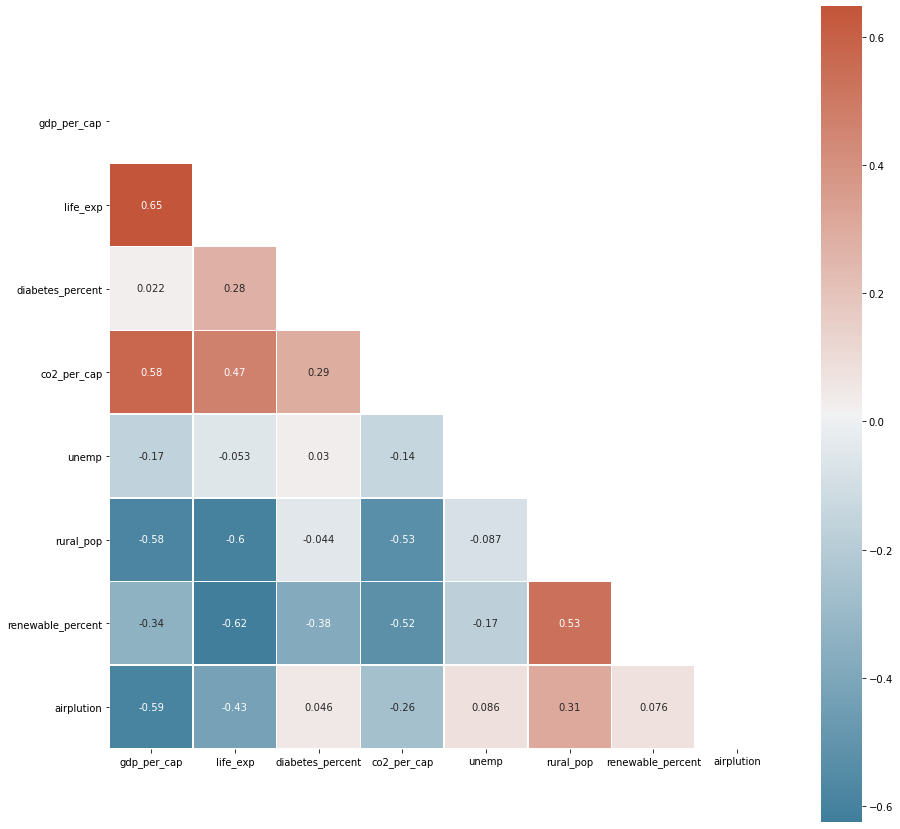

In [118]:
#corr = df.drop(['GDP','Population_in_mil'],axis=1).corr() #correlation matix ohne gsd und ohne population
f, ax = plt.subplots(figsize=(15, 15)) 
mask = np.triu(np.ones_like(df_corr, dtype=bool)) # removing the other side of the heatmap 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
#preparing cmap 
sns.heatmap(df_corr,mask=mask,cmap=cmap,linewidths=.5,square=True,annot=True) 
plt.show()

In [119]:
df_final_wo = df_cleaned
df_final_wo

,Country,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
47,Afghanistan,507.103432,64.486,9.2,0.245101,11.164,74.246,18.423477,100.000000
48,Albania,5353.244856,78.458,9.0,1.577163,12.813,38.771,38.615210,100.000000
49,Algeria,3973.964072,76.693,6.7,3.699156,11.525,26.811,0.058959,100.000000
52,Angola,2790.726615,60.782,4.5,1.202861,6.774,33.823,49.568210,100.000000
54,Argentina,9912.281809,76.520,5.9,4.619085,10.436,8.009,10.040078,93.852825
...,...,...,...,...,...,...,...,...,...
256,Vanuatu,3115.358620,70.323,11.9,0.527000,4.408,74.606,36.111065,100.000000
258,Vietnam,2715.276036,75.317,6.0,2.057566,2.022,63.372,34.998570,100.000000
261,"Yemen, Rep.",774.334490,66.096,5.4,0.390480,12.830,62.727,2.276417,100.000000
262,Zambia,1305.063254,63.510,4.5,0.314183,11.412,55.928,87.985452,100.000000


In [122]:
df_final_wo.drop(labels="Country", axis=1, inplace=True)
df_final_wo

C:\Users\broth\anaconda3\envs\kittycat\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
47,507.103432,64.486,9.2,0.245101,11.164,74.246,18.423477,100.000000
48,5353.244856,78.458,9.0,1.577163,12.813,38.771,38.615210,100.000000
49,3973.964072,76.693,6.7,3.699156,11.525,26.811,0.058959,100.000000
52,2790.726615,60.782,4.5,1.202861,6.774,33.823,49.568210,100.000000
54,9912.281809,76.520,5.9,4.619085,10.436,8.009,10.040078,93.852825
...,...,...,...,...,...,...,...,...
256,3115.358620,70.323,11.9,0.527000,4.408,74.606,36.111065,100.000000
258,2715.276036,75.317,6.0,2.057566,2.022,63.372,34.998570,100.000000
261,774.334490,66.096,5.4,0.390480,12.830,62.727,2.276417,100.000000
262,1305.063254,63.510,4.5,0.314183,11.412,55.928,87.985452,100.000000


In [125]:
X2= df_final_wo
X2

,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
47,507.103432,64.486,9.2,0.245101,11.164,74.246,18.423477,100.000000
48,5353.244856,78.458,9.0,1.577163,12.813,38.771,38.615210,100.000000
49,3973.964072,76.693,6.7,3.699156,11.525,26.811,0.058959,100.000000
52,2790.726615,60.782,4.5,1.202861,6.774,33.823,49.568210,100.000000
54,9912.281809,76.520,5.9,4.619085,10.436,8.009,10.040078,93.852825
...,...,...,...,...,...,...,...,...
256,3115.358620,70.323,11.9,0.527000,4.408,74.606,36.111065,100.000000
258,2715.276036,75.317,6.0,2.057566,2.022,63.372,34.998570,100.000000
261,774.334490,66.096,5.4,0.390480,12.830,62.727,2.276417,100.000000
262,1305.063254,63.510,4.5,0.314183,11.412,55.928,87.985452,100.000000


In [126]:
from sklearn.preprocessing import StandardScaler # makes mean ~ 0 and Std ~ 1 (but does not necessarily create normal distribution!!)
X_prep2 = StandardScaler().fit_transform(X2)

# Now, all features will have the same weight.
pd.DataFrame(X_prep2, columns = X2.columns).head()
pd.DataFrame(X_prep2).describe()
#looking good

,0,1,2,3,4,5,6,7
count,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,166.000000,1.660000e+02
mean,4.949187e-17,-4.012854e-17,3.183531e-16,5.016068e-17,6.119603e-17,8.828279e-17,0.000000,-7.356900e-18
std,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026e+00,1.003026,1.003026e+00
min,-7.030135e-01,-2.587455e+00,-1.685852e+00,-7.580923e-01,-1.303270e+00,-1.815584e+00,-1.197510,-3.288459e+00
25%,-6.190787e-01,-7.352642e-01,-6.340646e-01,-6.485794e-01,-6.691044e-01,-8.435532e-01,-0.871356,3.707764e-01
50%,-4.245554e-01,2.085579e-01,-2.665728e-01,-3.211575e-01,-3.231393e-01,-4.960802e-03,-0.276767,4.015330e-01
75%,1.228976e-01,7.059892e-01,4.747469e-01,2.355270e-01,4.242546e-01,7.548749e-01,0.672649,4.015330e-01
max,5.083283e+00,1.590663e+00,3.636444e+00,5.943533e+00,4.141473e+00,2.006062e+00,2.197507,4.015330e-01


In [127]:
df_standardized2 = pd.DataFrame(X_prep2)
df_standardized2

,0,1,2,3,4,5,6,7
0,-0.690583,-1.033464,0.392378,-0.720261,0.821704,1.455216,-0.544728,0.401533
1,-0.445560,0.825312,0.341690,-0.490633,1.137900,-0.107584,0.170706,0.401533
2,-0.515297,0.590504,-0.241229,-0.124832,0.890926,-0.634464,-1.195421,0.401533
3,-0.575122,-1.526228,-0.798802,-0.555157,-0.020078,-0.325561,0.558793,0.401533
4,-0.215054,0.567488,-0.443983,0.033750,0.682110,-1.462759,-0.841769,0.174703
...,...,...,...,...,...,...,...,...
161,-0.558709,-0.256934,1.076673,-0.671666,-0.473759,1.471076,0.081979,0.401533
162,-0.578937,0.407446,-0.418638,-0.407819,-0.931275,0.976178,0.042561,0.401533
163,-0.677072,-0.819276,-0.570704,-0.695200,1.141160,0.947763,-1.116851,0.401533
164,-0.650238,-1.163307,-0.798802,-0.708353,0.869258,0.648243,1.919994,0.401533


In [128]:
X_prep2 = df_standardized2

In [129]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state = 1234)
model.fit_predict(df_standardized2)

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state = 1234)
kmeans.fit(X_prep2)

KMeans(random_state=1234)

In [130]:
clusters2 = kmeans.predict(X_prep2)
clusters2

array([6, 4, 4, 1, 4, 4, 3, 7, 2, 4, 0, 6, 6, 2, 7, 6, 1, 1, 2, 4, 5, 4,
       3, 2, 1, 1, 5, 1, 1, 3, 1, 1, 2, 2, 4, 6, 1, 1, 4, 1, 2, 2, 2, 7,
       2, 2, 2, 6, 2, 2, 3, 5, 1, 6, 3, 5, 1, 4, 7, 1, 4, 6, 1, 1, 6, 5,
       2, 2, 3, 6, 2, 4, 3, 7, 6, 7, 4, 2, 1, 7, 0, 2, 1, 2, 2, 5, 1, 4,
       2, 7, 1, 1, 6, 3, 1, 7, 5, 6, 2, 2, 2, 4, 2, 1, 1, 5, 1, 7, 3, 6,
       1, 1, 4, 3, 0, 6, 2, 6, 2, 2, 2, 2, 3, 0, 2, 2, 1, 6, 5, 0, 1, 4,
       1, 7, 2, 2, 6, 5, 3, 6, 4, 4, 6, 3, 7, 5, 1, 2, 2, 1, 6, 0, 4, 4,
       1, 2, 0, 7, 3, 3, 2, 6, 2, 5, 1, 1])

[2, 3, 4, 5, 6, 7, 8]
[0.296103098765494, 0.2841367132288538, 0.28516918699776966, 0.26403714115261817, 0.2928901135204266, 0.287124972628144, 0.2842812035994023]


Text(0.5, 1.0, 'Silhouette Score showing the optimal k')

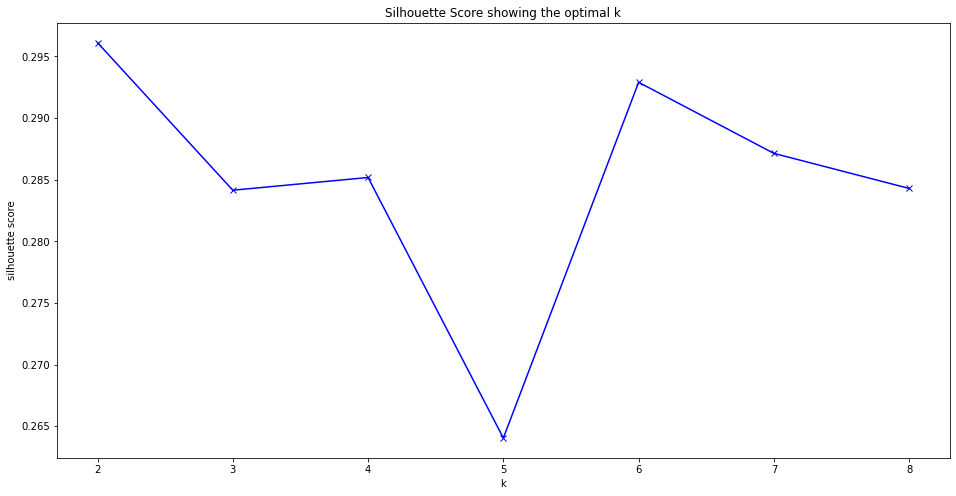

In [132]:
from sklearn.metrics import silhouette_score

K = range(2, 9)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep2)
    silhouette.append(silhouette_score(X_prep2, kmeans.predict(X_prep2)))

print(list(K))
print(silhouette)

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score showing the optimal k')

In [133]:
model = KMeans(n_clusters=6)
clusters2 = model.fit_predict(X_prep2)
print(silhouette_score(X_prep2, clusters2))

0.27874309823090204


In [134]:
print(pd.Series(clusters2).value_counts().sort_index())

0    24
1    15
2    28
3    18
4    36
5    45
dtype: int64


In [138]:
df_final_without_countries = df_cleaned
df_final_without_countries["cluster"] = clusters2
df_final_without_countries.head(20)

<ipython-input-138-02cdfca30f94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_without_countries["cluster"] = clusters2


,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution,cluster
47,507.103432,64.486000,9.2,0.245101,11.164,74.246,18.423477,100.000000,0
48,5353.244856,78.458000,9.0,1.577163,12.813,38.771,38.615210,100.000000,2
49,3973.964072,76.693000,6.7,3.699156,11.525,26.811,0.058959,100.000000,5
52,2790.726615,60.782000,4.5,1.202861,6.774,33.823,49.568210,100.000000,4
54,9912.281809,76.520000,5.9,4.619085,10.436,8.009,10.040078,93.852825,5
55,4622.733493,74.945000,6.1,1.755976,16.625,36.781,15.792004,100.000000,2
57,55060.326101,82.748780,5.6,15.539220,5.328,13.876,9.180503,24.893584,3
58,50137.662776,81.692683,6.6,7.033336,4.779,41.485,34.394992,85.051538,5
59,4793.587020,72.864000,6.1,3.855347,5.960,43.969,2.310758,100.000000,5
60,34863.742098,73.752000,8.8,4.725278,11.270,16.868,1.210513,100.000000,5


In [139]:
df_final_without_countries

,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution,cluster
47,507.103432,64.486,9.2,0.245101,11.164,74.246,18.423477,100.000000,0
48,5353.244856,78.458,9.0,1.577163,12.813,38.771,38.615210,100.000000,2
49,3973.964072,76.693,6.7,3.699156,11.525,26.811,0.058959,100.000000,5
52,2790.726615,60.782,4.5,1.202861,6.774,33.823,49.568210,100.000000,4
54,9912.281809,76.520,5.9,4.619085,10.436,8.009,10.040078,93.852825,5
...,...,...,...,...,...,...,...,...,...
256,3115.358620,70.323,11.9,0.527000,4.408,74.606,36.111065,100.000000,0
258,2715.276036,75.317,6.0,2.057566,2.022,63.372,34.998570,100.000000,5
261,774.334490,66.096,5.4,0.390480,12.830,62.727,2.276417,100.000000,2
262,1305.063254,63.510,4.5,0.314183,11.412,55.928,87.985452,100.000000,4


In [144]:
df_countries= df.dropna(axis=0, how='any',inplace=True)
df_countries2 = df_countries = df.iloc[44:]
df_countries2

,Country,population,GDP_in_Dollar,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution
47,Afghanistan,38041754.0,1.929110e+10,507.103432,64.486,9.2,0.245101,11.164,74.246,18.423477,100.000000
48,Albania,2854191.0,1.527918e+10,5353.244856,78.458,9.0,1.577163,12.813,38.771,38.615210,100.000000
49,Algeria,43053054.0,1.710913e+11,3973.964072,76.693,6.7,3.699156,11.525,26.811,0.058959,100.000000
52,Angola,31825295.0,8.881570e+10,2790.726615,60.782,4.5,1.202861,6.774,33.823,49.568210,100.000000
54,Argentina,44938712.0,4.454452e+11,9912.281809,76.520,5.9,4.619085,10.436,8.009,10.040078,93.852825
...,...,...,...,...,...,...,...,...,...,...,...
256,Vanuatu,299882.0,9.342400e+08,3115.358620,70.323,11.9,0.527000,4.408,74.606,36.111065,100.000000
258,Vietnam,96462106.0,2.619212e+11,2715.276036,75.317,6.0,2.057566,2.022,63.372,34.998570,100.000000
261,"Yemen, Rep.",29161922.0,2.258108e+10,774.334490,66.096,5.4,0.390480,12.830,62.727,2.276417,100.000000
262,Zambia,17861030.0,2.330977e+10,1305.063254,63.510,4.5,0.314183,11.412,55.928,87.985452,100.000000


In [145]:
df_cluster_6=pd.concat([df_countries2.Country.reset_index(drop=True),df_final_without_countries.reset_index(drop=True)],axis=1)
df_cluster_6

,Country,gdp_per_cap,life_exp,diabetes_percent,co2_per_cap,unemp,rural_pop,renewable_percent,airplution,cluster
0,Afghanistan,507.103432,64.486,9.2,0.245101,11.164,74.246,18.423477,100.000000,0
1,Albania,5353.244856,78.458,9.0,1.577163,12.813,38.771,38.615210,100.000000,2
2,Algeria,3973.964072,76.693,6.7,3.699156,11.525,26.811,0.058959,100.000000,5
3,Angola,2790.726615,60.782,4.5,1.202861,6.774,33.823,49.568210,100.000000,4
4,Argentina,9912.281809,76.520,5.9,4.619085,10.436,8.009,10.040078,93.852825,5
...,...,...,...,...,...,...,...,...,...,...
161,Vanuatu,3115.358620,70.323,11.9,0.527000,4.408,74.606,36.111065,100.000000,0
162,Vietnam,2715.276036,75.317,6.0,2.057566,2.022,63.372,34.998570,100.000000,5
163,"Yemen, Rep.",774.334490,66.096,5.4,0.390480,12.830,62.727,2.276417,100.000000,2
164,Zambia,1305.063254,63.510,4.5,0.314183,11.412,55.928,87.985452,100.000000,4


In [146]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [147]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world=world.rename(columns={'name':'Country'})

In [148]:
dic={'United States of America':'United States',
'Russia':'Russian Federation',
'South Korea': 'Korea, Rep.',
'Egypt': 'Egypt, Arab Rep.',
'Bosnia and Herz.':'Bosnia and Herzegovina',
'Central African Rep.':'Central African Republic',
"Côte d'Ivoire":"Cote d'Ivoire",
'Dem. Rep. Congo':'Congo, Dem. Rep.',
'Eq. Guinea':'Equatorial Guinea',
'Yemen':'Yemen, Rep.',
'Slovakia':'Slovak Republic',
'Kyrgyzstan':'Kyrgyz Republic'}

In [149]:
world.Country=world.Country.replace(dic)

In [153]:
world=world.merge(df_cluster_6[['Country','cluster']], on='Country', how='left')
world['cluster']=world['cluster']+1
world

,pop_est,continent,Country,iso_a3,gdp_md_est,geometry,cluster_x,cluster_y,cluster
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.0,0.0,1.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1.0,4.0,5.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1.0,3.0,4.0
4,326625791,North America,United States,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",1.0,2.0,3.0
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1.0,2.0,3.0
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",2.0,1.0,2.0


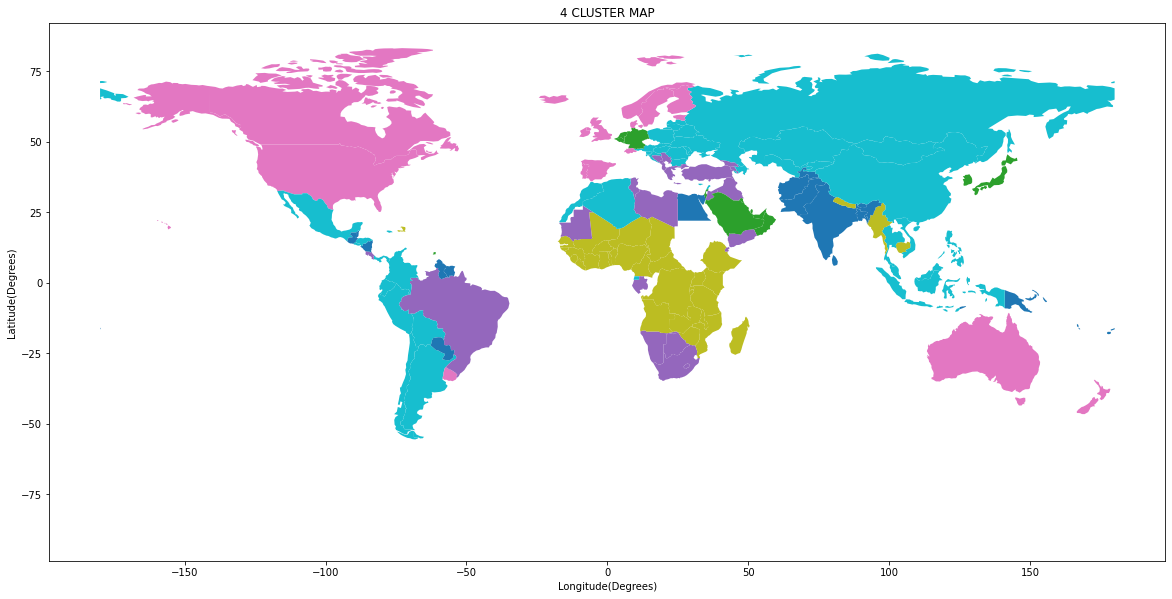

In [154]:
# Read world Countries

fig, ax = plt.subplots(figsize=(20,18))
world.plot(ax=ax, column='cluster',cmap='tab10')
#cities.plot(ax=ax, color='black', markersize=10, marker ='o')
#graticules.plot(ax=ax, color='lightgray', linewidth=0.5)
ax.set(xlabel='Longitude(Degrees)',ylabel='Latitude(Degrees)',title='4 CLUSTER MAP')
plt.show()

### CPA